In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

/Users/jpate/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/Users/jpate/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
housing = pd.read_csv('/Users/jpate/Documents/train.csv')

In [4]:
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
housing.shape

(1460, 81)

In [6]:
housing.isna().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [7]:
#it doesn't make sense to interpolate the missing values for these features,
#so in the interest of the most accurate model, I drop the Pool, Fence, MiscFeature, and FireplaceQu
#columns. And then I drop the remaining rows with na values

In [8]:
housing.drop('LotFrontage', axis=1, inplace=True) 

In [9]:
housing.drop('PoolQC', axis=1, inplace=True)

In [10]:
housing.drop('Fence', axis=1, inplace=True)

In [11]:
housing.drop('MiscFeature', axis=1, inplace=True)

In [12]:
housing.drop('FireplaceQu', axis=1, inplace=True)

In [13]:
housing.shape

(1460, 76)

In [14]:
housing.isna().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea 

In [15]:
housing.dropna(axis=0, subset=['BsmtQual', 
                       'BsmtCond', 
                       'BsmtExposure',
                       'BsmtFinType1',
                       'BsmtFinType2',
                       'Electrical',
                       'GarageType',
                       'GarageYrBlt',
                       'GarageFinish',
                       'GarageQual',
                       'GarageCond',
                       'MasVnrArea',
                       'MasVnrType'], inplace=True)

In [16]:
housing[['Alley']] = housing[['Alley']].fillna('UA', inplace=True)

/var/folders/tw/zw6t1r65653627d6yhcc6pt80000gn/T/ipykernel_32827/2978464720.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housing[['Alley']] = housing[['Alley']].fillna('UA', inplace=True)


In [17]:
housing.head(200)

,Id,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000
5,6,50,RL,14115,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,700,10,2009,WD,Normal,143000
6,7,20,RL,10084,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,0,8,2007,WD,Normal,307000
7,8,60,RL,10382,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,350,11,2009,WD,Normal,200000
8,9,50,RM,6120,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,0,4,2008,WD,Abnorml,129900
9,10,190,RL,7420,Pave,None,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,GasA,Ex,Y,SBrkr,1077,0,0,1077,1,0,1,0,2,2,TA,5,Typ,2,Attchd,1939.0,RFn,1,205,Gd,TA,Y,0,4,0,0,0,0,0,1,2008,WD,Normal,118000


In [17]:
#taking a quick check on how the features may be correlated

In [18]:
housing.corr()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.016725,-0.036083,-0.044455,0.011850,-0.023595,-0.028434,-0.051038,-0.004919,-0.004908,-0.010196,-0.018637,0.009750,-0.002866,-0.047958,0.001067,0.010210,-0.028333,-0.000334,-0.013197,0.041290,0.013834,0.022852,-0.017839,-0.003114,0.009797,0.013658,-0.032801,-0.005332,0.005106,-0.043766,0.000904,0.059455,-0.002206,0.020939,0.002241,-0.030473
MSSubClass,0.016725,1.000000,-0.134158,0.051690,-0.098153,0.056456,0.038513,0.031333,-0.069053,-0.079329,-0.141025,-0.263613,-0.258787,0.306709,0.019990,0.068782,-0.011317,-0.000151,0.117720,0.197520,-0.065699,0.239177,0.014514,-0.024752,0.082040,0.006872,-0.070278,-0.010175,-0.000359,-0.022598,-0.041391,-0.022748,0.010199,-0.021512,-0.016283,-0.021591,-0.079599
LotArea,-0.036083,-0.134158,1.000000,0.090451,0.001415,-0.005022,0.001681,0.096727,0.210148,0.110493,-0.014589,0.267188,0.288502,0.047773,0.009729,0.255445,0.160687,0.046420,0.115727,0.006052,0.120369,-0.012611,0.185654,0.263061,-0.025700,0.138228,0.168630,0.167822,0.084942,-0.017968,0.019326,0.038489,0.077050,0.040824,0.000118,-0.012066,0.254757
OverallQual,-0.044455,0.051690,0.090451,1.000000,-0.163080,0.570668,0.549460,0.401175,0.197441,-0.086014,0.292940,0.505897,0.481978,0.281145,-0.016704,0.594470,0.083254,-0.064952,0.580425,0.249283,0.081994,-0.135084,0.442941,0.377359,0.545835,0.591878,0.530092,0.218570,0.307615,-0.116931,0.026470,0.045257,0.064570,-0.029351,0.062641,-0.013949,0.783546
OverallCond,0.011850,-0.098153,0.001415,-0.163080,1.000000,-0.417330,0.035076,-0.141080,-0.060068,0.035698,-0.161038,-0.228020,-0.144066,0.011685,0.041865,-0.093843,-0.070089,0.119671,-0.211882,-0.073568,0.023180,-0.070910,-0.063883,-0.031910,-0.336541,-0.249832,-0.204905,-0.012947,-0.060429,0.071473,0.023789,0.053759,-0.003544,0.077314,-0.011772,0.056340,-0.108627
YearBuilt,-0.023595,0.056456,-0.005022,0.570668,-0.417330,1.000000,0.617156,0.299410,0.224264,-0.070403,0.147762,0.385146,0.263585,0.006989,-0.160289,0.189146,0.175108,-0.055204,0.486777,0.227626,-0.080644,-0.176124,0.099415,0.110807,0.825172,0.524076,0.443854,0.212296,0.216793,-0.385415,0.028982,-0.070809,0.001006,-0.033493,0.004396,-0.007898,0.504297
YearRemodAdd,-0.028434,0.038513,0.001681,0.549460,0.035076,0.617156,1.000000,0.168311,0.099681,-0.085268,0.171881,0.264281,0.241889,0.120545,-0.064395,0.276580,0.099294,-0.023966,0.460120,0.169456,-0.074393,-0.154147,0.174660,0.089952,0.641585,0.459449,0.386213,0.201057,0.231129,-0.218452,0.039422,-0.052513,0.003354,-0.001379,0.014552,0.034503,0.501435
MasVnrArea,-0.051038,0.031333,0.096727,0.401175,-0.141080,0.299410,0.168311,1.000000,0.253015,-0.083303,0.104662,0.365629,0.341001,0.169730,-0.061707,0.392006,0.078875,0.015804,0.272271,0.193268,0.108829,-0.007299,0.289758,0.229365,0.249750,0.363916,0.367237,0.149182,0.129015,-0.112225,0.015221,0.052474,0.009334,-0.028975,-0.013461,-0.001521,0.465811
BsmtFinSF1,-0.004919,-0.069053,0.210148,0.197441,-0.060068,0.224264,0.099681,0.253015,1.000000,-0.064855,-0.552809,0.505000,0.450366,-0.151876,-0.051909,0.201974,0.638094,0.057227,0.045094,-0.025251,-0.119100,-0.035623,0.046284,0.245323,0.144611,0.197559,0.284095,0.187178,0.107561,-0.105669,0.026811,0.051906,0.142708,0.007869,-0.021242,0.023958,0.359677
BsmtFinSF2,-0.004908,-0.079329,0.110493,-0.086014,0.035698,-0.070403,-0.085268,-0.083303,-0.064855,1.000000,-0.233449,0.083184,0.094065,-0.109254,0.007072,-0.021993,0.154980,0.072813,-0.090448,-0.038494,-0.008179,-0.028278,-0.042207,0.035643,-0.092595,-0.080264,-0.053411,0.061206,0.004211,0.045668,-0.031475,0.085865,0.041148,0.006246,-0.022039,0.032855,-0.031226


In [19]:
#nothing immediately jumps out, but let's look at a heatmap

<AxesSubplot:>

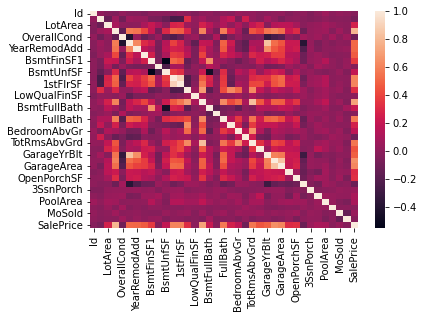

In [20]:
sns.heatmap(housing.corr())

In [21]:
#a good visual, but let's try to resize and make more sense out of it

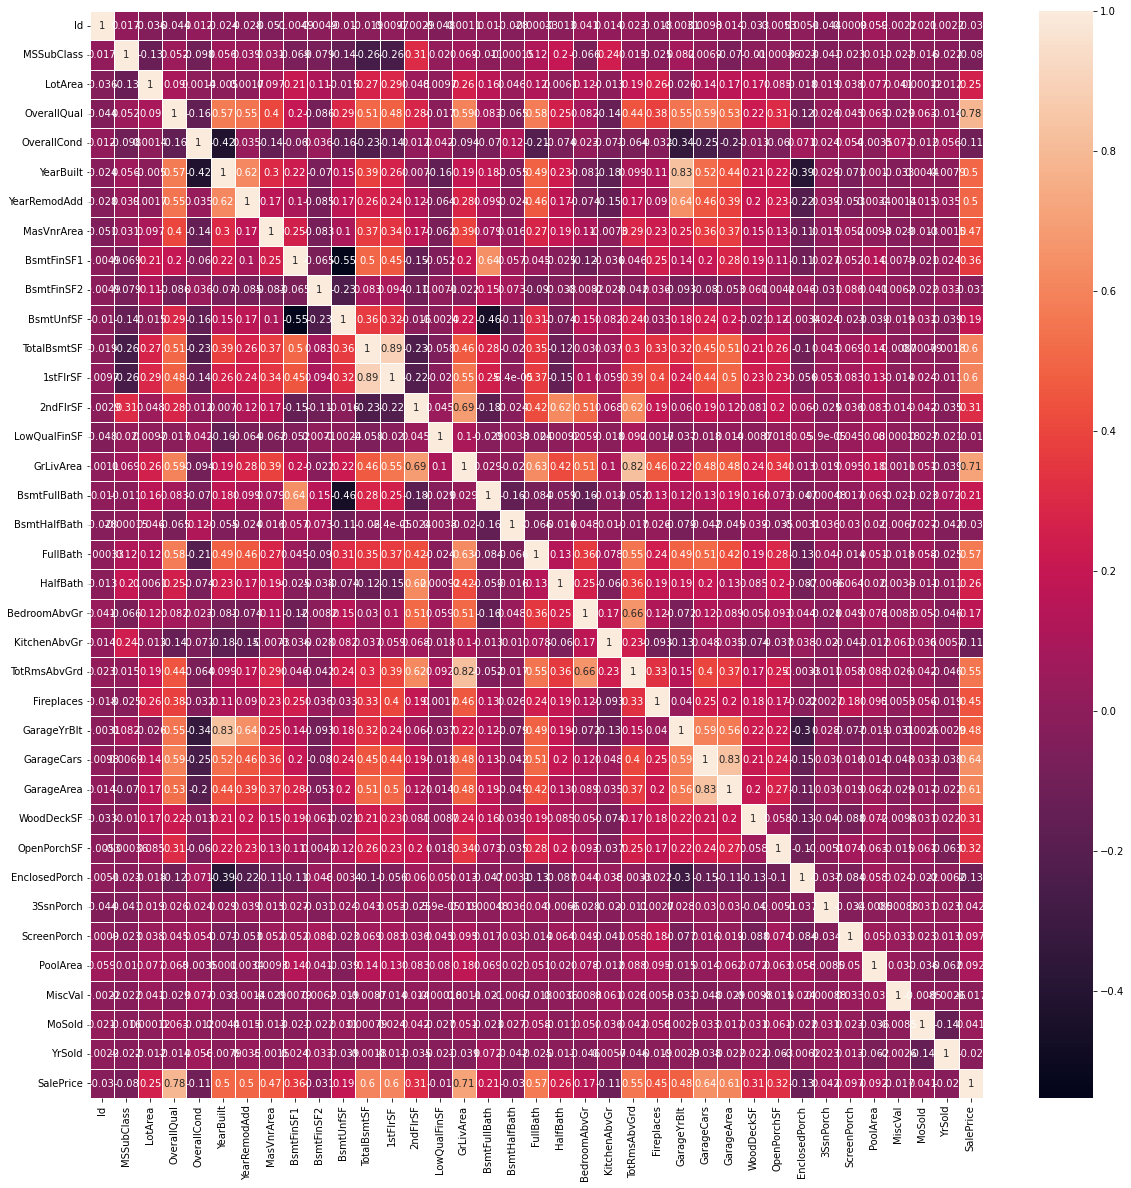

In [22]:
plt.figure(figsize = (20,20))

ax = sns.heatmap(housing.corr(), annot=True, linewidths=1)

In [23]:
#definitely some strong correlations. Let's look at the a couple of scatterplots

In [24]:
y=housing['SalePrice']

x=housing[['LotArea',
           'OverallQual',
           'YearBuilt',
           'YearRemodAdd',
           'MasVnrArea',
           'BsmtFinSF1',
           'TotalBsmtSF',
           '1stFlrSF',
           '2ndFlrSF',
           'GrLivArea',
           'BsmtFullBath',
           'FullBath',
           'HalfBath',
           'TotRmsAbvGrd',
           'Fireplaces',
           'GarageYrBlt',
           'GarageCars',
           'GarageArea',
           'WoodDeckSF',
           'OpenPorchSF',
          ]]

len(x) == len(y) #verify nothing went wrong

True

In [25]:
reg = LinearRegression().fit(x,y)

In [26]:
coefficients = pd.concat([pd.DataFrame(x.columns), pd.DataFrame(np.transpose(reg.coef_))], axis = 1)

In [27]:
coefficients

,0,0
0,LotArea,0.475488
1,OverallQual,20940.499368
2,YearBuilt,211.590836
3,YearRemodAdd,395.543028
4,MasVnrArea,27.739205
5,BsmtFinSF1,12.661361
6,TotalBsmtSF,12.672839
7,1stFlrSF,9.780457
8,2ndFlrSF,8.178536
9,GrLivArea,31.049846


In [28]:
X2 = sm.add_constant(x)

/Users/jpate/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


In [29]:
est = sm.OLS(y, X2)

In [30]:
est2 = est.fit()

In [31]:
est2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     245.5
Date:                Fri, 01 Apr 2022   Prob (F-statistic):               0.00
Time:                        22:30:36   Log-Likelihood:                -15946.
No. Observations:                1338   AIC:                         3.193e+04
Df Residuals:                    1317   BIC:                         3.204e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1.093e+06   1.52e+05     -7.212      0.000   -1.39e+06   -7.96e+05
LotArea          0.4755      0.106      4.499      0.000       0.268       0.683
OverallQual   2.094e+04   1263.844     16.569      0.000    1.85e+04    2.34e+04
YearBuilt      211.5908     74.198      2.852      0.004      66.031     357.151
YearRemodAdd   395.5430     70.232      5.632      0.000     257.764     533.322
MasVnrArea      27.7392      6.329      4.383      0.000      15.323      40.156
BsmtFinSF1      12.6614      3.262      3.881      0.000       6.261      19.061
TotalBsmtSF     12.6728      6.250      2.028      0.043       0.412      24.934
1stFlrSF         9.7805     26.338      0.371      0.710     -41.889      61.450
2ndFlrSF         8.1785     25.638      0.319      0.750     -42.118      58.475
GrLivArea       31.0498     25.539      1.216      0.224     -19.051      81.151
BsmtFullBath  5404.5143   2623.635      2.060      0.040     257.553    1.06e+04
FullBath     -4649.2682   3120.749     -1.490      0.137   -1.08e+04    1472.914
HalfBath     -3086.5100   2951.588     -1.046      0.296   -8876.837    2703.817
TotRmsAbvGrd  2698.6985   1162.564      2.321      0.020     418.018    4979.379
Fireplaces    6415.7633   1896.843      3.382      0.001    2694.599    1.01e+04
GarageYrBlt    -97.0524     84.410     -1.150      0.250    -262.644      68.539
GarageCars    1.233e+04   3174.174      3.885      0.000    6105.566    1.86e+04
GarageArea      14.5120     10.777      1.347      0.178      -6.630      35.654
WoodDeckSF      25.9479      8.417      3.083      0.002       9.435      42.461
OpenPorchSF      5.6885     16.893      0.337      0.736     -27.452      38.829
==============================================================================
Omnibus:                      644.186   Durbin-Watson:                   1.948
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           105869.358
Skew:                          -1.140   Prob(JB):                         0.00
Kurtosis:                      46.518   Cond. No.                     2.31e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.31e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [32]:
x_variables = x

In [33]:
vif_data = pd.DataFrame()
vif_data["feature"] = x_variables.columns
vif_data["VIF"] = [variance_inflation_factor(x_variables.values, i) for i in range(len(x_variables.columns))]
print(vif_data)

         feature           VIF
0        LotArea      2.458010
1    OverallQual     56.147072
2      YearBuilt  20715.751533
3   YearRemodAdd  13588.248918
4     MasVnrArea      1.867459
5     BsmtFinSF1      4.534603
6    TotalBsmtSF     53.188890
7       1stFlrSF   1063.770762
8       2ndFlrSF    211.300365
9      GrLivArea   1713.431751
10  BsmtFullBath      3.116869
11      FullBath     22.693461
12      HalfBath      3.360050
13  TotRmsAbvGrd     60.406489
14    Fireplaces      2.949619
15   GarageYrBlt  25200.147346
16    GarageCars     38.575023
17    GarageArea     32.942276
18    WoodDeckSF      1.811993
19   OpenPorchSF      1.864828


In [34]:
std_housing

NameError: name 'std_housing' is not defined

In [35]:
scaler = StandardScaler()  

std_housing = scaler.fit_transform(x)
std_price = scaler.fit_transform(housing['SalePrice'].values.reshape(-1,1))

In [36]:
std_x = pd.DataFrame(std_housing, columns=[ 'LotArea',
                                            'OverallQual',
                                            'YearBuilt',
                                            'YearRemodAdd',
                                            'MasVnrArea',
                                            'BsmtFinSF1',
                                            'TotalBsmtSF',
                                            '1stFlrSF',
                                            '2ndFlrSF',
                                            'GrLivArea',
                                            'BsmtFullBath',
                                            'FullBath',
                                            'HalfBath',
                                            'TotRmsAbvGrd',
                                            'Fireplaces',
                                            'GarageYrBlt',
                                            'GarageCars',                                                 
                                            'GarageArea',
                                            'WoodDeckSF',
                                            'OpenPorchSF'])

In [37]:
std_y = pd.DataFrame(std_price, columns=['SalePrice'])

In [38]:
reg = LinearRegression().fit(std_x, std_y)

In [39]:
coefficients = pd.concat([pd.DataFrame(std_x.columns), pd.DataFrame(np.transpose(reg.coef_))], axis = 1)
coefficients

,0,0
0,LotArea,0.062282
1,OverallQual,0.351460
2,YearBuilt,0.079268
3,YearRemodAdd,0.101733
4,MasVnrArea,0.065242
5,BsmtFinSF1,0.073611
6,TotalBsmtSF,0.065128
7,1stFlrSF,0.047920
8,2ndFlrSF,0.045635
9,GrLivArea,0.204830


In [40]:
std_X2 = sm.add_constant(std_x)

/Users/jpate/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


In [41]:
std_est = sm.OLS(std_y, std_X2)

In [42]:
std_est2 = std_est.fit()

In [43]:
std_est2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     245.5
Date:                Fri, 01 Apr 2022   Prob (F-statistic):               0.00
Time:                        22:31:18   Log-Likelihood:                -859.20
No. Observations:                1338   AIC:                             1760.
Df Residuals:                    1317   BIC:                             1870.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -4.684e-17      0.013   -3.7e-15      1.000      -0.025       0.025
LotArea          0.0623      0.014      4.499      0.000       0.035       0.089
OverallQual      0.3515      0.021     16.569      0.000       0.310       0.393
YearBuilt        0.0793      0.028      2.852      0.004       0.025       0.134
YearRemodAdd     0.1017      0.018      5.632      0.000       0.066       0.137
MasVnrArea       0.0652      0.015      4.383      0.000       0.036       0.094
BsmtFinSF1       0.0736      0.019      3.881      0.000       0.036       0.111
TotalBsmtSF      0.0651      0.032      2.028      0.043       0.002       0.128
1stFlrSF         0.0479      0.129      0.371      0.710      -0.205       0.301
2ndFlrSF         0.0456      0.143      0.319      0.750      -0.235       0.326
GrLivArea        0.2048      0.168      1.216      0.224      -0.126       0.535
BsmtFullBath     0.0353      0.017      2.060      0.040       0.002       0.069
FullBath        -0.0323      0.022     -1.490      0.137      -0.075       0.010
HalfBath        -0.0197      0.019     -1.046      0.296      -0.057       0.017
TotRmsAbvGrd     0.0542      0.023      2.321      0.020       0.008       0.100
Fireplaces       0.0525      0.016      3.382      0.001       0.022       0.083
GarageYrBlt     -0.0305      0.026     -1.150      0.250      -0.082       0.022
GarageCars       0.0991      0.026      3.885      0.000       0.049       0.149
GarageArea       0.0343      0.026      1.347      0.178      -0.016       0.084
WoodDeckSF       0.0419      0.014      3.083      0.002       0.015       0.069
OpenPorchSF      0.0047      0.014      0.337      0.736      -0.023       0.032
==============================================================================
Omnibus:                      644.186   Durbin-Watson:                   1.948
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           105869.358
Skew:                          -1.140   Prob(JB):                         0.00
Kurtosis:                      46.518   Cond. No.                         51.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
std_x_variables = std_x

In [45]:
vif_data = pd.DataFrame()
vif_data["feature"] = std_x_variables.columns
vif_data["VIF"] = [variance_inflation_factor(std_x_variables.values, i) for i in range(len(std_x_variables.columns))]
print(vif_data)

         feature         VIF
0        LotArea    1.193213
1    OverallQual    2.801952
2      YearBuilt    4.811620
3   YearRemodAdd    2.031892
4     MasVnrArea    1.379981
5     BsmtFinSF1    2.240292
6    TotalBsmtSF    6.424795
7       1stFlrSF  103.702950
8       2ndFlrSF  127.442187
9      GrLivArea  176.751111
10  BsmtFullBath    1.830091
11      FullBath    2.920013
12      HalfBath    2.214524
13  TotRmsAbvGrd    3.395627
14    Fireplaces    1.498647
15   GarageYrBlt    4.372754
16    GarageCars    4.053327
17    GarageArea    4.050843
18    WoodDeckSF    1.152453
19   OpenPorchSF    1.219208


In [46]:
#we still see some multicollinearity between 1st and 2nd floor SF and GrLivArea. Let's see if we can solve that
#let's make a new feature that will be a linear combination of 1stFlrSF and 2ndFlrSF

In [47]:
std_x['SF_diff'] = std_x['2ndFlrSF'] - std_x['1stFlrSF']
std_x = std_x.drop(['2ndFlrSF' ,'1stFlrSF'], axis=1)

In [121]:
std_x

,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,TotalBsmtSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SF_diff
0,-0.218363,0.589337,1.014157,0.854216,0.461582,0.527157,-0.591875,0.331321,1.088949,0.775560,1.184848,0.915080,-1.005546,0.985427,0.202747,0.249341,-0.779554,0.202294,1.957329
1,-0.107067,-0.165963,0.100528,-0.476562,-0.594820,1.120240,0.409598,-0.529579,-0.851149,0.775560,-0.799291,-0.347165,0.544478,-0.104844,0.202747,-0.222023,1.557895,-0.731311,-1.033324
2,0.052620,0.589337,0.946480,0.804928,0.278328,0.047458,-0.434007,0.477367,1.088949,0.775560,1.184848,-0.347165,0.544478,0.904666,0.202747,0.570726,-0.779554,-0.088501,1.819004
3,-0.111906,0.589337,-1.963596,-0.772291,-0.594820,-0.541263,-0.838543,0.344773,1.088949,-1.051375,-0.799291,0.283958,0.544478,0.783525,1.779928,0.752844,-0.779554,-0.195636,1.463015
4,0.343926,1.344638,0.912642,0.706352,1.291612,0.415954,0.120996,1.269088,1.088949,0.775560,1.184848,1.546203,0.544478,0.864286,1.779928,1.791989,0.726453,0.554309,1.661702
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,-0.269947,-0.165963,0.878804,0.706352,-0.594820,-1.012240,-0.352607,0.210257,-0.851149,0.775560,1.184848,0.283958,0.544478,0.823905,0.202747,-0.222023,-0.779554,-0.119111,1.342855
1334,0.238920,-0.165963,0.168204,0.114895,0.046567,0.710315,1.100269,1.028881,1.088949,0.775560,-0.799291,0.283958,2.094501,-0.024083,0.202747,-0.007766,1.957928,-0.731311,-3.131640
1335,-0.161070,0.589337,-1.083805,1.002081,-0.594820,-0.412617,0.138263,1.541963,-0.851149,0.775560,-0.799291,1.546203,2.094501,-1.518159,-1.374434,-1.336157,-0.779554,0.186989,1.775365
1336,-0.095744,-0.921263,-0.779263,0.509200,-0.594820,-0.905398,-0.044271,-0.883163,1.088949,-1.051375,-0.799291,-0.978287,-1.005546,-1.154735,-1.374434,-1.400434,2.091273,-0.731311,-0.557257


In [48]:
std_x_variables = std_x

vif_data = pd.DataFrame()
vif_data["feature"] = std_x_variables.columns
vif_data["VIF"] = [variance_inflation_factor(std_x_variables.values, i) for i in range(len(std_x_variables.columns))]
print(vif_data)

         feature       VIF
0        LotArea  1.193193
1    OverallQual  2.799565
2      YearBuilt  4.722289
3   YearRemodAdd  2.027433
4     MasVnrArea  1.375880
5     BsmtFinSF1  2.239839
6    TotalBsmtSF  6.339768
7      GrLivArea  7.438360
8   BsmtFullBath  1.829740
9       FullBath  2.909477
10      HalfBath  2.212866
11  TotRmsAbvGrd  3.395200
12    Fireplaces  1.497161
13   GarageYrBlt  4.284284
14    GarageCars  4.052699
15    GarageArea  4.050843
16    WoodDeckSF  1.152284
17   OpenPorchSF  1.218698
18       SF_diff  4.755502


In [49]:
#we see TotalBsmtSF and GrLivArea are both above 5.
#Since GrLivArea is the square footage ABOVE the basement, I know they're collinear. So let's fix that one too.

In [50]:
std_x['AboveBelowGradeDiff'] = std_x['GrLivArea'] - std_x['TotalBsmtSF']
std_x = std_x.drop(['GrLivArea' ,'TotalBsmtSF'], axis=1)

In [51]:
std_x_variables = std_x

vif_data = pd.DataFrame()
vif_data["feature"] = std_x_variables.columns
vif_data["VIF"] = [variance_inflation_factor(std_x_variables.values, i) for i in range(len(std_x_variables.columns))]
print(vif_data)

                feature       VIF
0               LotArea  1.173669
1           OverallQual  2.552753
2             YearBuilt  4.675921
3          YearRemodAdd  2.027433
4            MasVnrArea  1.350184
5            BsmtFinSF1  2.087539
6          BsmtFullBath  1.823796
7              FullBath  2.639996
8              HalfBath  2.097352
9          TotRmsAbvGrd  2.482111
10           Fireplaces  1.481752
11          GarageYrBlt  4.262127
12           GarageCars  4.036516
13           GarageArea  3.933496
14           WoodDeckSF  1.147078
15          OpenPorchSF  1.191831
16              SF_diff  4.117903
17  AboveBelowGradeDiff  5.235805


In [ ]:
#the new feature is slightly above 5, but I don't want to lose that data so I'm choosing to keep it in. let's build the model

In [52]:
#predictor split
housing_x_train = std_x[:-20]
housing_x_test = std_x[-20:]

#response split
housing_y_train = std_y[:-20]
housing_y_test = std_y[-20:]

In [53]:
regr = LinearRegression().fit(housing_x_train, housing_y_train)

In [54]:
housing_y_pred = regr.predict(housing_x_test)

In [55]:
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(housing_y_test, housing_y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(housing_y_test, housing_y_pred))

Coefficients: 
 [[ 0.07776589  0.40962408  0.05697537  0.09991348  0.08228582  0.11796948
   0.02798953  0.02700011  0.02005608  0.16550718  0.06539004 -0.04728304
   0.08146369  0.07840923  0.0520226   0.02350411 -0.06510443  0.08151679]]
Mean squared error: 0.18
Coefficient of determination: 0.77


In [67]:
SGDRegressor_pipe = Pipeline([
    ('StandardScaler', StandardScaler()),
    ('SGDRegressor', SGDRegressor())
]).fit(housing_x_train, housing_y_train)

sgd_y_pred = SGDRegressor_pipe.predict(housing_x_test)

print(f"SGDRegressor MSE: {mean_squared_error(housing_y_test, sgd_y_pred):.2f}")
print('Coefficient of determination: %.2f'
      % r2_score(housing_y_test, sgd_y_pred))

SGDRegressor MSE: 0.18
Coefficient of determination: 0.78


/Users/jpate/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [64]:
PolynomialRegression_pipe = Pipeline([
    ('StandardScaler', StandardScaler()),
    ("PCA", PolynomialFeatures(degree=2)),
    ('LinearRegression', LinearRegression())
]).fit(housing_x_train, housing_y_train)

lin_pca_y_pred = PolynomialRegression_pipe.predict(housing_x_test)

print(f"PolynomialRegression (degree 2) MSE: {mean_squared_error(housing_y_test, lin_pca_y_pred):.2f}")
print('Coefficient of determination: %.2f'
      % r2_score(housing_y_test, lin_pca_y_pred))

PolynomialRegression (degree 2) MSE: 0.16
Coefficient of determination: 0.80
